In [1]:
!pip install ucimlrepo
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset from UCI Machine Learning Repository
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
data = bank_marketing.data.features
data_targets = bank_marketing.data.targets
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


# Exploring the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [5]:
# metadata
print(bank_marketing.metadata)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [6]:
# Variable information
print(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

# Fields and Data Types

# Understanding Data

In [7]:
# Comprehensive dataset overview
def dataset_overview(df):
    print(f"\n{' Dataset Overview ':=^80}")
    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nDescriptive Statistics:")
    print(df.describe(include='all'))
    print("\nUnique Counts:")
    print(pd.DataFrame({col: df[col].nunique() for col in df.columns}, index=['Unique Count']).T)
dataset_overview(data)


=============================== Dataset Overview ===============================
Shape: (45211, 16)

Data Types:
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
dtype: object

Missing Values:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

Descriptive Statistics:
                 age          job  marital  education default        balance  \
count   45211.000000        44923    45211      4

In [8]:
# Display column names of the dataset
data.columns.values

# day_of_week and month **

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome'], dtype=object)

In [9]:
# Count the ocurrences of each Country in the dataset
data.month.value_counts()

# ** married = 3 divorced and 2 single

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [10]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


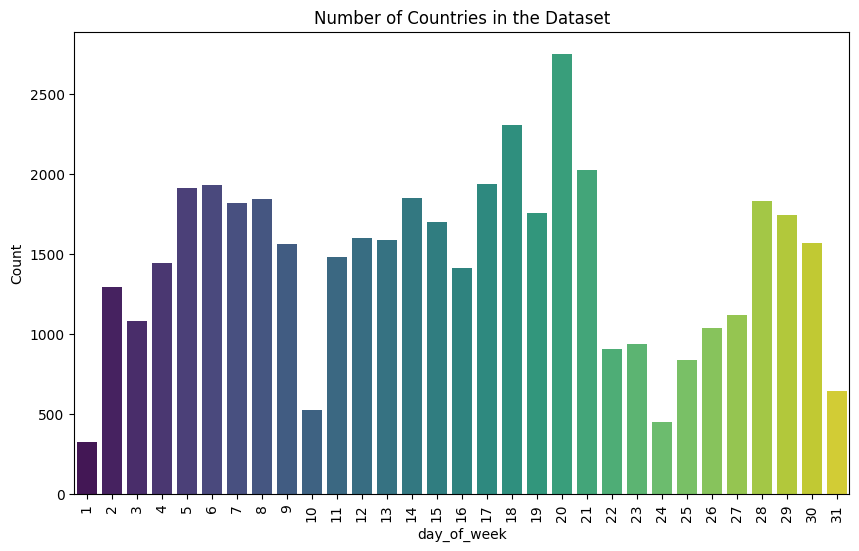

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week',data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title("Number of Countries in the Dataset")
plt.xlabel("day_of_week")
plt.ylabel("Count")
plt.show()

# Missing values and negatives quantities

In [12]:
# Check for missing values
print(data.isnull().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


In [13]:
data.shape

(45211, 16)

In [14]:
data["contact"].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [15]:
# replace NaN values
# data["contact"] = data["contact"].fillna("Others")
# print(data["contact"])

In [16]:
# Job
print(data["job"].unique())

# Education
print(data["education"].unique())

# Poutcome
print(data["poutcome"].unique())

# Contact
print(data["contact"].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
['tertiary' 'secondary' nan 'primary']
[nan 'failure' 'other' 'success']
[nan 'cellular' 'telephone']


In [17]:
def replaceNaNvaluesOther(data: pd.DataFrame, column_name: str) -> pd.Series:
    if column_name in data.columns:
        data[column_name] = data[column_name].fillna("other")
        return data[column_name]
    else:
        print(f"La columna '{column_name}' no existe en el DataFrame.")
        return pd.Series()

In [18]:
# Job
print("=".center(50,"="))
replaceNaNvaluesOther(data,"job")
print(data["job"])

# Education
print("=".center(50,"="))
replaceNaNvaluesOther(data,"education")
print(data["education"])

# Poutcome
print("=".center(50,"="))
replaceNaNvaluesOther(data,"poutcome")
print(data["poutcome"])

# Contact
print("=".center(50,"="))
replaceNaNvaluesOther(data,"contact")
print(data["contact"])

0          management
1          technician
2        entrepreneur
3         blue-collar
4               other
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object
0         tertiary
1        secondary
2        secondary
3            other
4            other
           ...    
45206     tertiary
45207      primary
45208    secondary
45209    secondary
45210    secondary
Name: education, Length: 45211, dtype: object
0          other
1          other
2          other
3          other
4          other
          ...   
45206      other
45207      other
45208    success
45209      other
45210      other
Name: poutcome, Length: 45211, dtype: object
0            other
1            other
2            other
3            other
4            other
           ...    
45206     cellular
45207     cellular
45208     cellular
45209    telephone
45210     cellular
Name: contact, Length:

In [19]:
# Check for missing values
print(data.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


In [20]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,other,5,may,261,1,-1,0,other
1,44,technician,single,secondary,no,29,yes,no,other,5,may,151,1,-1,0,other
2,33,entrepreneur,married,secondary,no,2,yes,yes,other,5,may,76,1,-1,0,other
3,47,blue-collar,married,other,no,1506,yes,no,other,5,may,92,1,-1,0,other
4,33,other,single,other,no,1,no,no,other,5,may,198,1,-1,0,other


# EDA (Exploratory Data Analysis)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


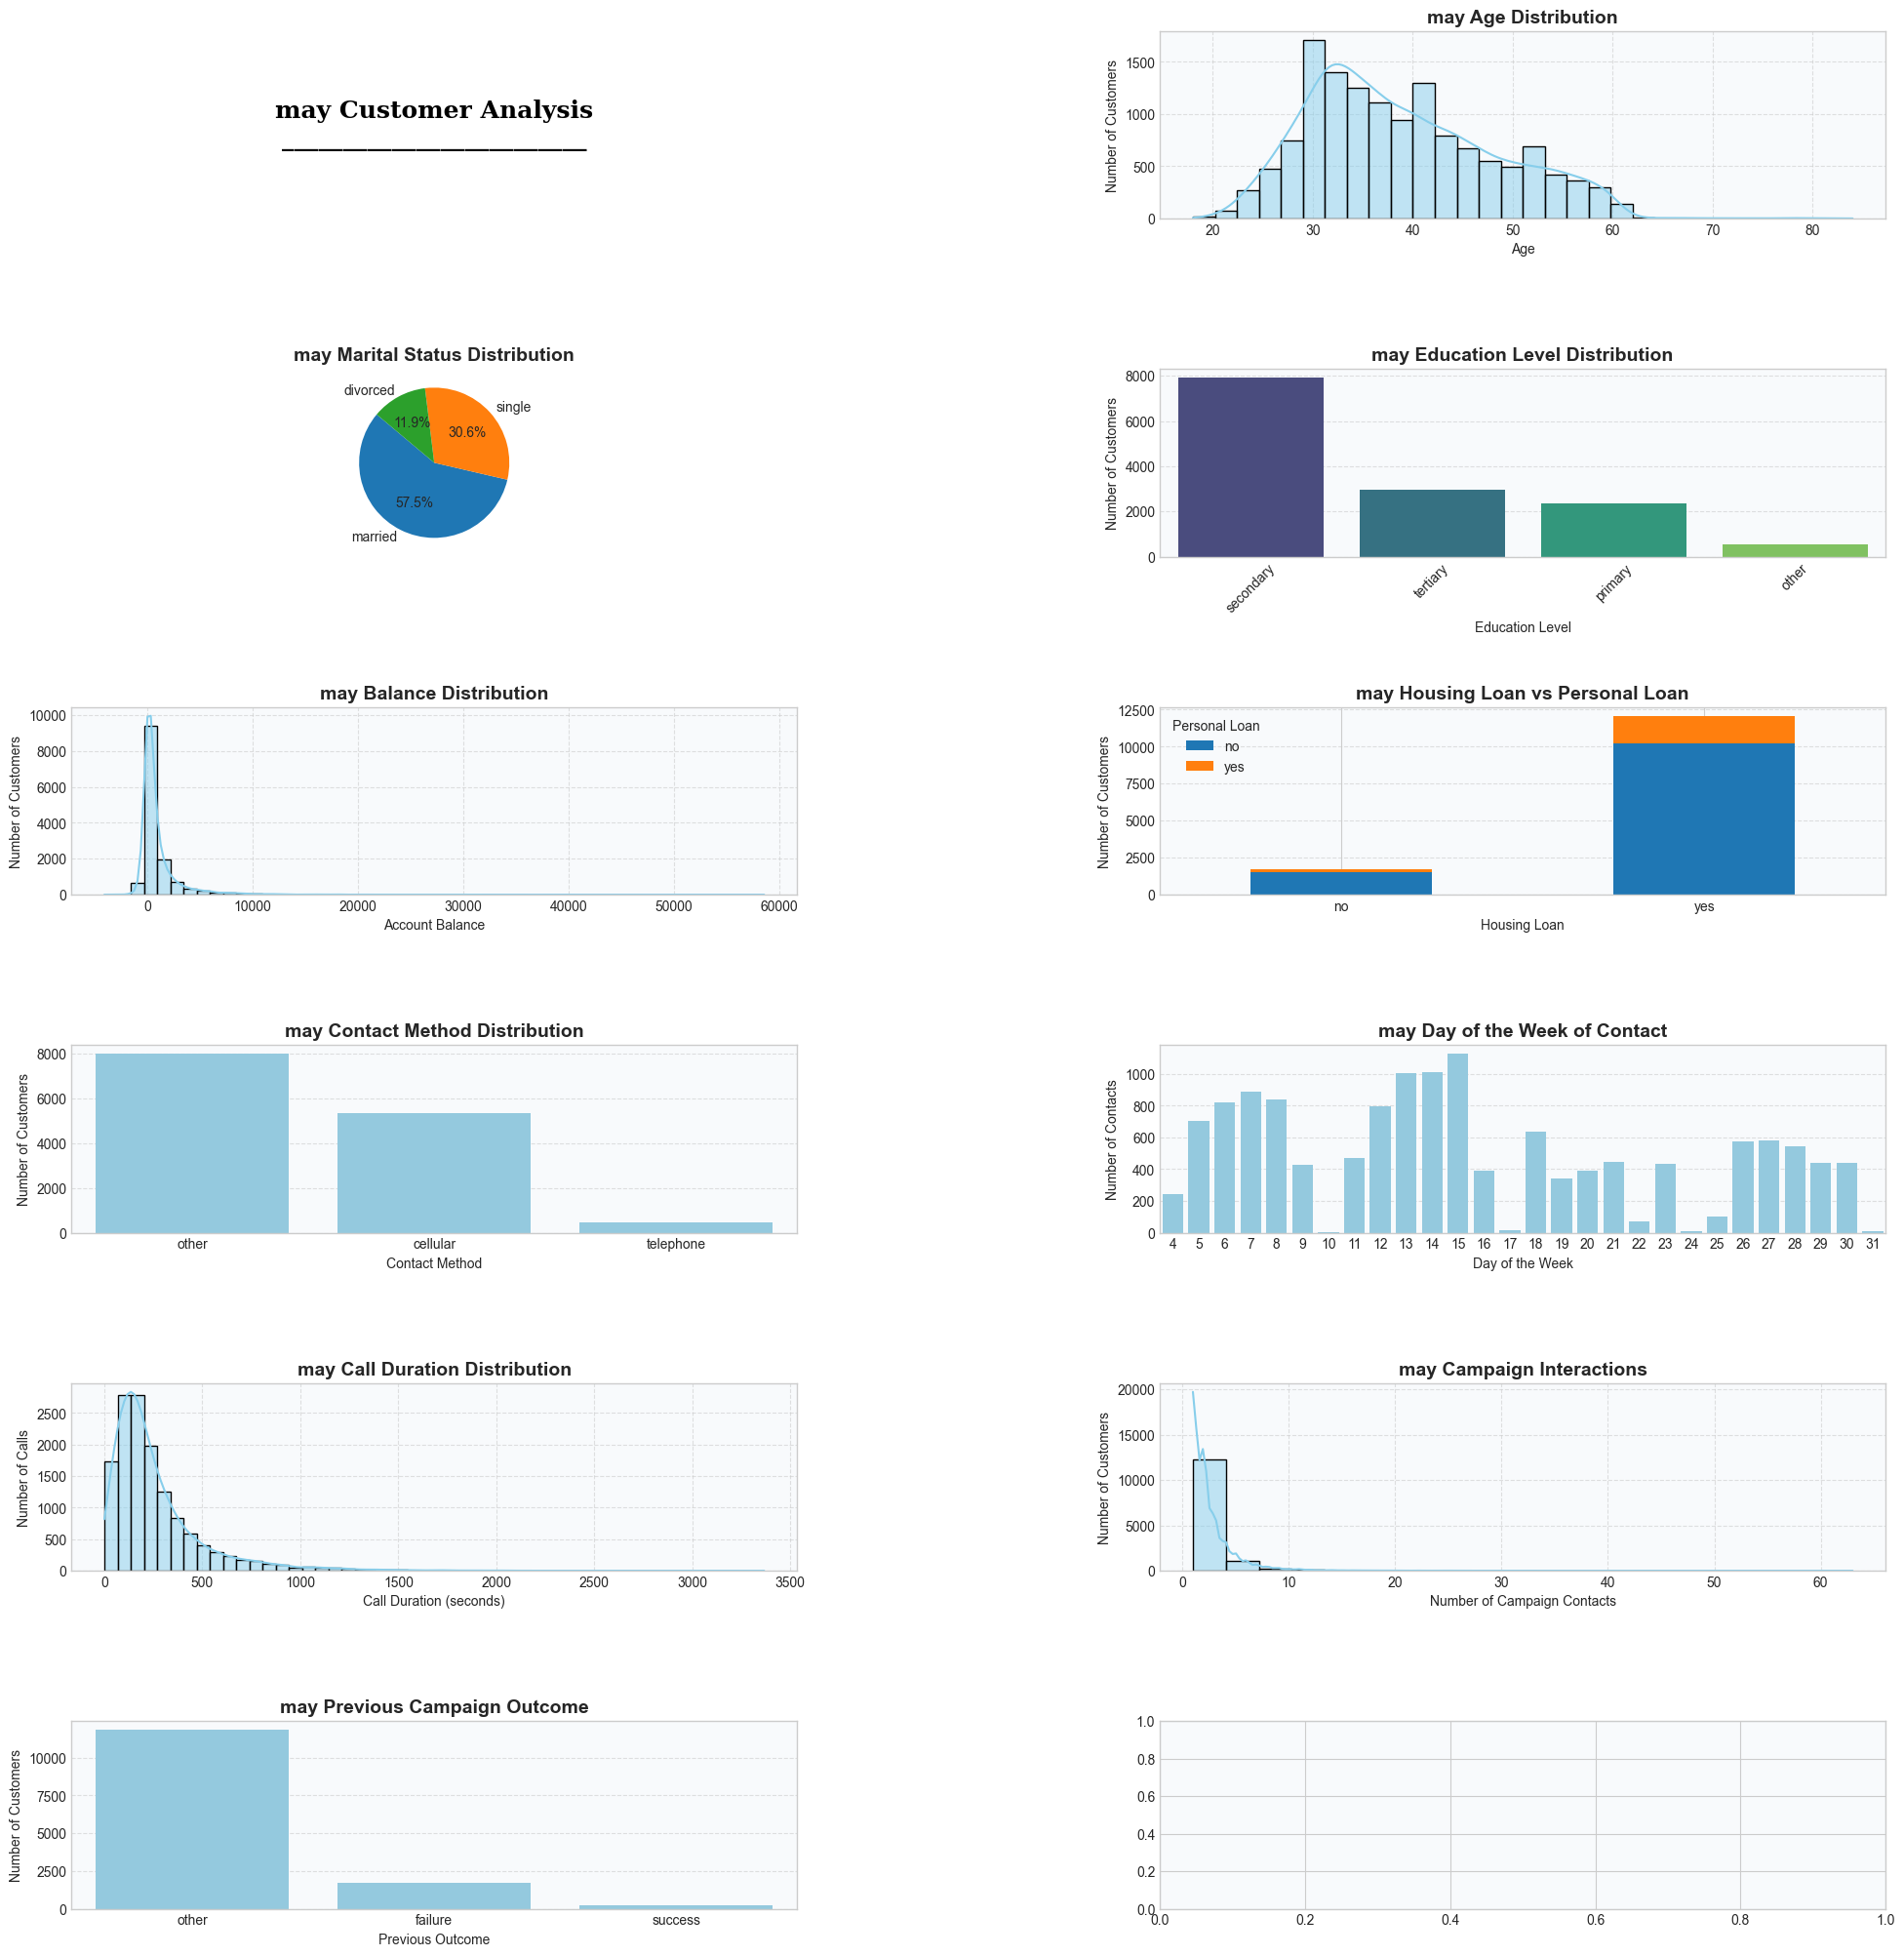

In [21]:
# Analyzes customer data for a specific month with visualizations (excluding NLP).
def analyze_month_adapted(data, month, color, month_column='month'):
    """

    Parameters:
        data: DataFrame containing the customer dataset.
        month: Name of the month to analyze.
        color: Primary color for visualizations.
        month_column: Name of the column containing the month information.
    """
    # Filter data for the specified month
    monthly_data = data[data[month_column] == month].copy()
    if monthly_data.empty:
        print(f"No data available for the month: {month}")
        return

    # Initial setup
    background_color = "#f8fafc"
    plt.style.use('seaborn-v0_8-whitegrid')

    # Set up the figure
    fig = plt.figure(figsize=(24, 25)) # Adjusted figure height
    gs = fig.add_gridspec(6, 2) # Adjusted grid layout
    gs.update(wspace=0.5, hspace=0.8)

    # Create axes
    axes = [fig.add_subplot(gs[i, j]) for i in range(6) for j in range(2)]
    for ax in axes:
        ax.set_facecolor(background_color)

    # Main title
    axes[0].axis('off')
    axes[0].text(0.5, 0.5,
                    f'{month} Customer Analysis\n_________________________',
                    horizontalalignment='center',
                    verticalalignment='center',
                    fontsize=18, fontweight='bold',
                    fontfamily='serif',
                    color="#000000")

    # 1. Distribution of Age
    sns.histplot(ax=axes[1], data=monthly_data, x='age', bins=30, kde=True, color=color)
    axes[1].set_title(f'{month} Age Distribution', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Number of Customers')
    axes[1].grid(True, linestyle='--', alpha=0.6)

    # 2. Marital Status Distribution
    marital_counts = monthly_data['marital'].value_counts()
    axes[2].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette(n_colors=len(marital_counts)))
    axes[2].set_title(f'{month} Marital Status Distribution', fontsize=14, fontweight='bold')

    # 3. Education Level Distribution
    education_counts = monthly_data['education'].value_counts().dropna()
    sns.barplot(
        ax=axes[3], 
        x=education_counts.index, 
        y=education_counts.values, 
        palette='viridis'  # Usar palette en lugar de color
    )
    axes[3].set_title(f'{month} Education Level Distribution', fontsize=14, fontweight='bold')
    axes[3].set_xlabel('Education Level')
    axes[3].set_ylabel('Number of Customers')
    axes[3].tick_params(axis='x', rotation=45)  # Eliminado 'ha' y solo usar rotation
    axes[3].grid(axis='y', linestyle='--', alpha=0.6)

    # 4. Balance Distribution
    sns.histplot(ax=axes[4], data=monthly_data, x='balance', bins=50, kde=True, color=color)
    axes[4].set_title(f'{month} Balance Distribution', fontsize=14, fontweight='bold')
    axes[4].set_xlabel('Account Balance')
    axes[4].set_ylabel('Number of Customers')
    axes[4].grid(True, linestyle='--', alpha=0.6)

    # 5. Housing Loan vs Personal Loan
    loan_housing = monthly_data.groupby(['housing', 'loan']).size().unstack()
    loan_housing.plot(kind='bar', stacked=True, ax=axes[5], color=sns.color_palette()[:2])
    axes[5].set_title(f'{month} Housing Loan vs Personal Loan', fontsize=14, fontweight='bold')
    axes[5].set_xlabel('Housing Loan')
    axes[5].set_ylabel('Number of Customers')
    axes[5].tick_params(axis='x', rotation=0)
    axes[5].legend(title='Personal Loan')
    axes[5].grid(axis='y', linestyle='--', alpha=0.6)

    # 6. Contact Method Distribution
    contact_counts = monthly_data['contact'].value_counts()
    sns.barplot(ax=axes[6], x=contact_counts.index, y=contact_counts.values, color=color)
    axes[6].set_title(f'{month} Contact Method Distribution', fontsize=14, fontweight='bold')
    axes[6].set_xlabel('Contact Method')
    axes[6].set_ylabel('Number of Customers')
    axes[6].grid(axis='y', linestyle='--', alpha=0.6)

    # 7. Day of the Week Distribution
    dow_counts = monthly_data['day_of_week'].value_counts().sort_index()
    sns.barplot(ax=axes[7], x=dow_counts.index, y=dow_counts.values, color=color)
    axes[7].set_title(f'{month} Day of the Week of Contact', fontsize=14, fontweight='bold')
    axes[7].set_xlabel('Day of the Week')
    axes[7].set_ylabel('Number of Contacts')
    axes[7].grid(axis='y', linestyle='--', alpha=0.6)

    # 8. Duration of Calls Distribution
    sns.histplot(ax=axes[8], data=monthly_data, x='duration', bins=50, kde=True, color=color)
    axes[8].set_title(f'{month} Call Duration Distribution', fontsize=14, fontweight='bold')
    axes[8].set_xlabel('Call Duration (seconds)')
    axes[8].set_ylabel('Number of Calls')
    axes[8].grid(True, linestyle='--', alpha=0.6)

    # 9. Campaign Interactions Distribution
    sns.histplot(ax=axes[9], data=monthly_data, x='campaign', bins=20, kde=True, color=color)
    axes[9].set_title(f'{month} Campaign Interactions', fontsize=14, fontweight='bold')
    axes[9].set_xlabel('Number of Campaign Contacts')
    axes[9].set_ylabel('Number of Customers')
    axes[9].grid(True, linestyle='--', alpha=0.6)

    # 10. Previous Contacts Outcome
    poutcome_counts = monthly_data['poutcome'].value_counts()
    sns.barplot(ax=axes[10], x=poutcome_counts.index, y=poutcome_counts.values, color=color)
    axes[10].set_title(f'{month} Previous Campaign Outcome', fontsize=14, fontweight='bold')
    axes[10].set_xlabel('Previous Outcome')
    axes[10].set_ylabel('Number of Customers')
    axes[10].grid(axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

    # --- Interactive Visualizations with Plotly ---
    # 1. Age Distribution (Interactive Histogram)
    fig_hist_age = go.Figure(data=[go.Histogram(x=monthly_data['age'], nbinsx=30, marker_color=color)])
    fig_hist_age.update_layout(
        title=f'{month} Age Distribution',
        xaxis_title='Age',
        yaxis_title='Number of Customers',
        template='plotly_white'
    )
    fig_hist_age.show()

    # 2. Marital Status Distribution (Interactive Pie Chart)
    fig_pie_marital = go.Figure(data=[go.Pie(labels=marital_counts.index, values=marital_counts.values, marker_colors=sns.color_palette(n_colors=len(marital_counts)))])
    fig_pie_marital.update_layout(
        title=f'{month} Marital Status Distribution',
        template='plotly_white'
    )
    fig_pie_marital.show()

    # 3. Education Level Distribution (Interactive Bar Chart)
    fig_bar_edu = go.Figure(data=[
        go.Bar(
            x=education_counts.index,
            y=education_counts.values,
            marker_color=color 
        )
    ])
    fig_bar_edu.update_layout(
        title=f'{month} Education Level Distribution',
        xaxis_title='Education Level',
        yaxis_title='Number of Customers',
        template='plotly_white'
    )
    fig_bar_edu.show()

    # 4. Balance Distribution (Interactive Histogram)
    fig_hist_balance = go.Figure(data=[go.Histogram(x=monthly_data['balance'], nbinsx=50, marker_color=color)])
    fig_hist_balance.update_layout(
        title=f'{month} Balance Distribution',
        xaxis_title='Account Balance',
        yaxis_title='Number of Customers',
        template='plotly_white'
    )
    fig_hist_balance.show()


    # 5. Contact Method Distribution (Interactive Bar Chart)
    fig_bar_contact = go.Figure(data=[go.Bar(x=contact_counts.index, y=contact_counts.values, marker_color=color)])
    fig_bar_contact.update_layout(
        title=f'{month} Contact Method Distribution',
        xaxis_title='Contact Method',
        yaxis_title='Number of Customers',
        template='plotly_white'
    )
    fig_bar_contact.show()

    # 6. Day of the Week of Contact (Interactive Bar Chart)
    fig_bar_dow = go.Figure(data=[go.Bar(x=dow_counts.index.map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri'}), y=dow_counts.values, marker_color=color)])
    fig_bar_dow.update_layout(
        title=f'{month} Day of the Week of Contact',
        xaxis_title='Day of the Week',
        yaxis_title='Number of Contacts',
        template='plotly_white'
    )
    fig_bar_dow.show()

    # 7. Call Duration Distribution (Interactive Histogram)
    fig_hist_duration = go.Figure(data=[go.Histogram(x=monthly_data['duration'], nbinsx=50, marker_color=color)])
    fig_hist_duration.update_layout(
        title=f'{month} Call Duration Distribution',
        xaxis_title='Call Duration (seconds)',
        yaxis_title='Number of Calls',
        template='plotly_white'
    )
    fig_hist_duration.show()

    # 8. Campaign Interactions (Interactive Histogram)
    fig_hist_campaign = go.Figure(data=[go.Histogram(x=monthly_data['campaign'], nbinsx=20, marker_color=color)])
    fig_hist_campaign.update_layout(
        title=f'{month} Campaign Interactions',
        xaxis_title='Number of Campaign Contacts',
        yaxis_title='Number of Customers',
        template='plotly_white'
    )
    fig_hist_campaign.show()

    # 9. Previous Campaign Outcome (Interactive Bar Chart)
    fig_bar_poutcome = go.Figure(data=[go.Bar(x=poutcome_counts.index, y=poutcome_counts.values, marker_color=color)])
    fig_bar_poutcome.update_layout(
        title=f'{month} Previous Campaign Outcome',
        xaxis_title='Previous Outcome',
        yaxis_title='Number of Customers',
        template='plotly_white'
    )
    fig_bar_poutcome.show()

# First, let's see the columns to identify the month column
print(data.columns)

# Call the function
analyze_month_adapted(data, 'may', 'skyblue', month_column='month')

# Feature Engineering

In [22]:
# Enhance the dataset with new engineered features and transformations.
def feature_engineering(data):
    """    
    Parameters:
        data: Input dataframe
        
    Returns:
        pd.DataFrame: Enhanced dataframe with new features
    """
    # Create interaction feature between education and job
    data['education_job_interaction'] = data['education'] + '_' + data['job']
    
    # Create age bins (categorical feature from numerical)
    data['age_group'] = pd.cut(data['age'],
                                bins=[0, 30, 45, 60, 100],
                                labels=['young', 'adult', 'middle-aged', 'senior'])
    
    # Create financial status feature combining balance and loan status
    data['financial_status'] = np.where(
        (data['balance'] > 0) & (data['loan'] == 'no'),
        'healthy',
        np.where(
            (data['balance'] <= 0) & (data['loan'] == 'no'),
            'neutral',
            'risky'
        )
    )
    
    # Create campaign success ratio (current contacts vs previous contacts)
    data['contact_ratio'] = (data['campaign'] + 1) / (data['previous'] + 1)  # +1 to avoid division by zero
    
    return data

# Apply feature engineering
data = feature_engineering(data)
print("\nData after feature engineering:")
print(data[['education_job_interaction', 'age_group', 'financial_status', 'contact_ratio']].head())


Data after feature engineering:
  education_job_interaction    age_group financial_status  contact_ratio
0       tertiary_management  middle-aged          healthy            2.0
1      secondary_technician        adult          healthy            2.0
2    secondary_entrepreneur        adult            risky            2.0
3         other_blue-collar  middle-aged          healthy            2.0
4               other_other        adult          healthy            2.0


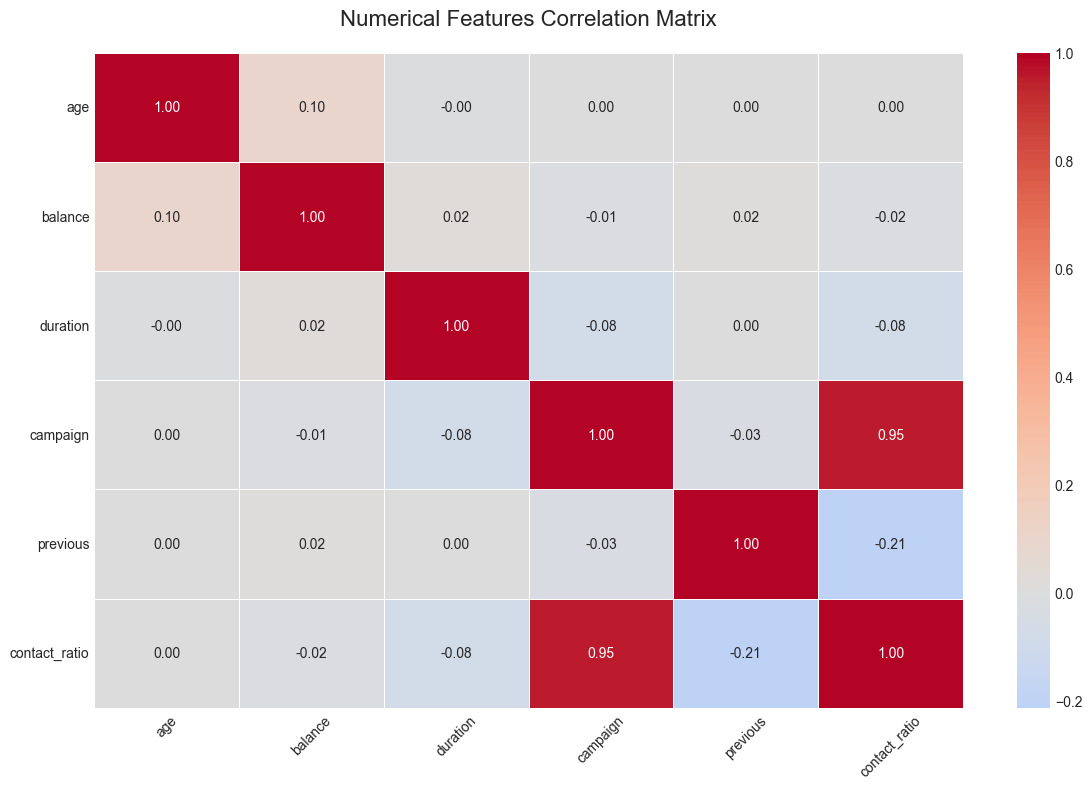

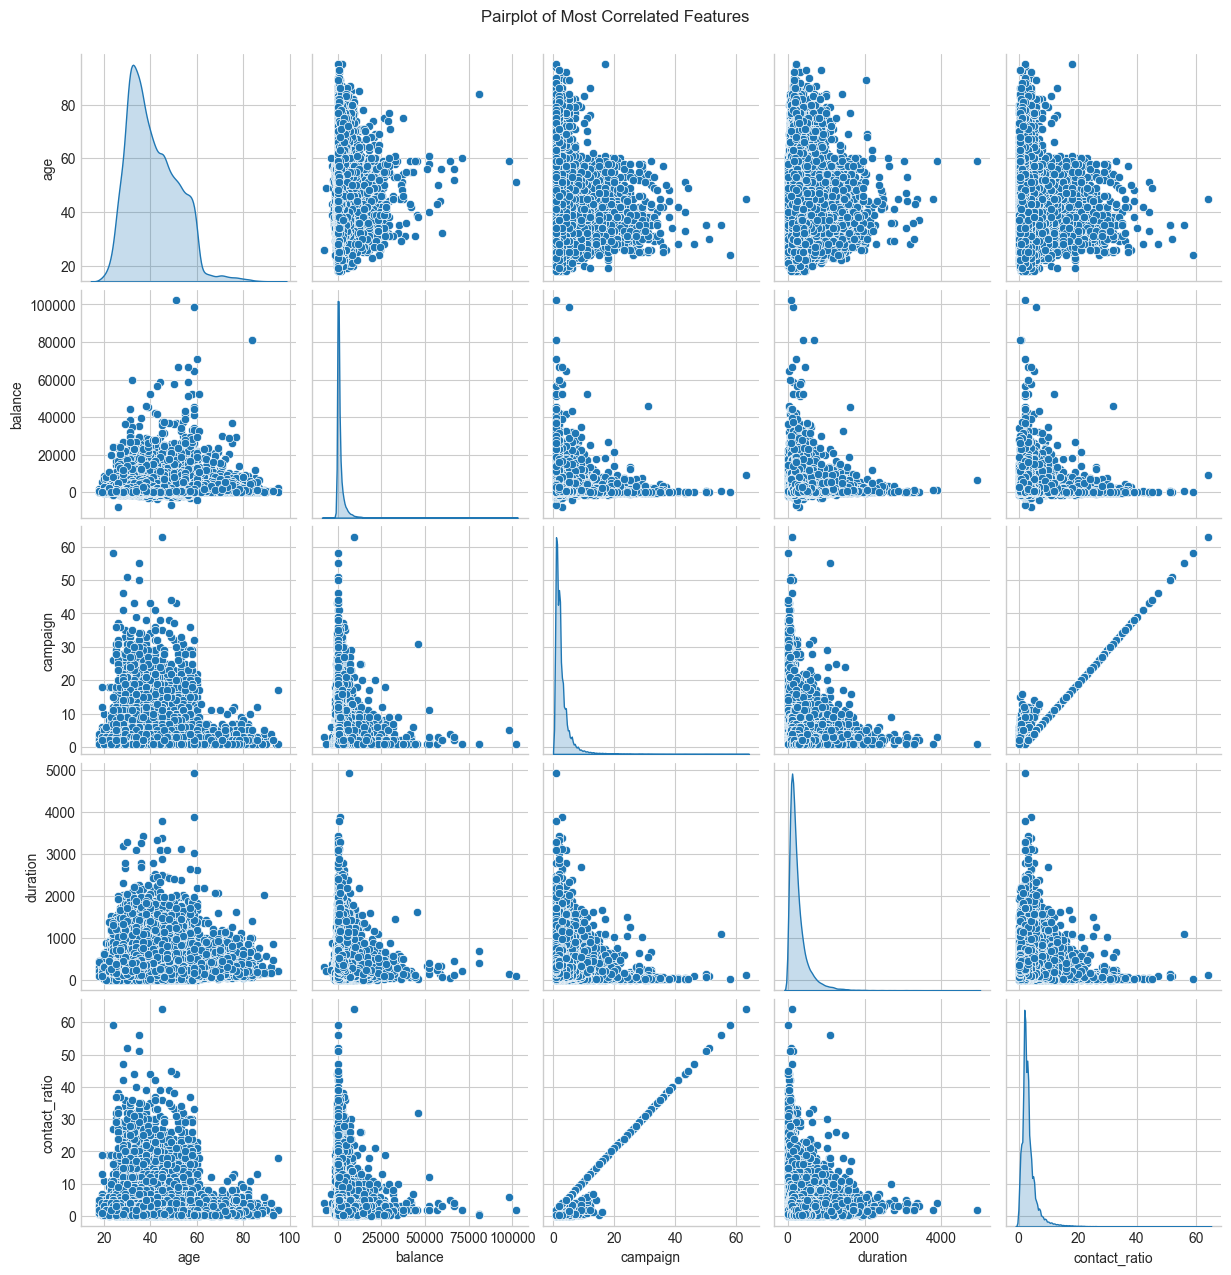

In [23]:
# Perform and visualize correlation analysis for numerical features.
def plot_correlation_analysis(df, numerical_cols):
    """
    
    Parameters:
        df (pd.DataFrame): Input dataframe
        numerical_cols (list): List of numerical column names
    """
    # Calculate correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                linewidths=0.5)
    plt.title('Numerical Features Correlation Matrix', pad=20, fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Plot pairplot for top correlated features
    top_features = corr_matrix.abs().nlargest(5, columns=corr_matrix.columns[0]).index
    sns.pairplot(df[top_features], diag_kind='kde')
    plt.suptitle('Pairplot of Most Correlated Features', y=1.02)
    plt.show()

# Select numerical columns for correlation analysis
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'previous', 'contact_ratio']
plot_correlation_analysis(data, numerical_cols)

In [35]:
print("Original data shapes:")
print(f"Features shape: {data.shape}")
print(f"Target shape: {data_targets.shape}")

# Verify the target column name in data_targets
print("\nTarget columns:", data_targets.columns)

data['y'] = data_targets['y']

Original data shapes:
Features shape: (45211, 21)
Target shape: (45211, 1)

Target columns: Index(['y'], dtype='object')


# Predictive Modeling

In [24]:
# Prepare data for machine learning modeling.
def prepare_data(df):
    # Create a copy to avoid modifying original data
    df_prep = df.copy()
    
    # Convert target to binary
    df_prep['y'] = df_prep['y'].map({'yes': 1, 'no': 0})
    
    X = df_prep.drop(columns=['y'])
    y = df_prep['y']
    
    return X, y

In [25]:
# Create preprocessing pipeline for different feature types.
def preprocess_features(X):
    """    
    Parameters:
        X: Input features
        
    Returns:
        ColumnTransformer: Prepared preprocessing pipeline
    """
    # Define categorical and numerical features
    categorical_cols = X.select_dtypes(include=['object', 'category']).columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Create transformers
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Combine transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_cols),
            ('num', numerical_transformer, numerical_cols)
        ])
    
    return preprocessor

In [26]:
# Evaluate multiple classification models using cross-validation.
def evaluate_models(X, y, preprocessor):
    # Define models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }
    
    # Evaluate each model
    results = {}
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Perform cross-validation
        kfold = KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='roc_auc')
        
        # Store results
        results[name] = {
            'mean_auc': cv_results.mean(),
            'std_auc': cv_results.std()
        }
        
        print(f"{name}:")
        print(f"  Mean AUC: {cv_results.mean():.4f}")
        print(f"  Std AUC: {cv_results.std():.4f}")
        print("=".center(50, "="))
    
    return results

In [27]:
# Perform hyperparameter tuning for the best performing model.
def optimize_best_model(X, y, preprocessor, best_model_name):
    """    
    Parameters:
        X: Features
        y: Target
        preprocessor: Prepared preprocessing pipeline
        best_model_name: Name of the best model from initial evaluation
    """
    # Define parameter grids for each model
    param_grids = {
        'Random Forest': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20],
            'model__min_samples_split': [2, 5]
        },
        'Gradient Boosting': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [3, 5]
        }
    }
    
    # Select the appropriate model
    model = RandomForestClassifier() if best_model_name == 'Random Forest' else GradientBoostingClassifier()
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Perform GridSearchCV
    print(f"\nPerforming hyperparameter tuning for {best_model_name}...")
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X, y)
    
    # Print best parameters and score
    print(f"\nBest parameters for {best_model_name}:")
    print(grid_search.best_params_)
    print(f"Best AUC score: {grid_search.best_score_:.4f}")
    
    return grid_search.best_estimator_

In [34]:
# Prepare data
X, y = prepare_data(data)
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Preprocess features
preprocessor = preprocess_features(X)

# Evaluate models
model_results = evaluate_models(X, y, preprocessor)

# Select the best model
best_model_name = max(model_results, key=lambda x: model_results[x]['mean_auc'])
print(f"\nOptimizing best model: {best_model_name}")
best_model_name = optimize_best_model(X, y, preprocessor, best_model_name)

X shape: (45211, 20)
y shape: (45211,)
Logistic Regression:
  Mean AUC: 0.9083
  Std AUC: 0.0034
Decision Tree:
  Mean AUC: 0.7036
  Std AUC: 0.0035
Random Forest:
  Mean AUC: 0.9229
  Std AUC: 0.0042
Gradient Boosting:
  Mean AUC: 0.9261
  Std AUC: 0.0041

Optimizing best model: Gradient Boosting

Performing hyperparameter tuning for Gradient Boosting...
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters for Gradient Boosting:
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}
Best AUC score: 0.6890


# Final Evaluation


Final Evaluation:

Final Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.66      0.34      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

ROC AUC Score: 0.9172


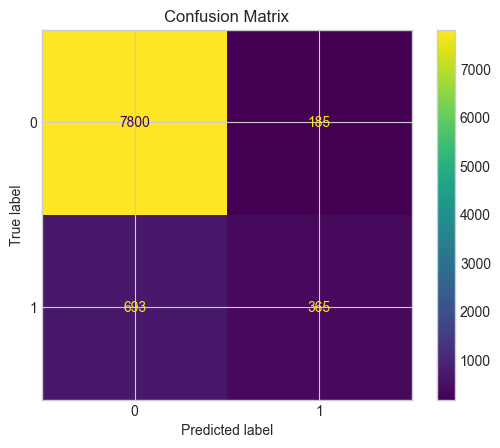

In [36]:
# Evaluate the final model on a holdout set.
def evaluate_final_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print("\nFinal Model Performance:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

print("\nFinal Evaluation:")
evaluate_final_model(best_model_name, X, y)

# Model Interpretation

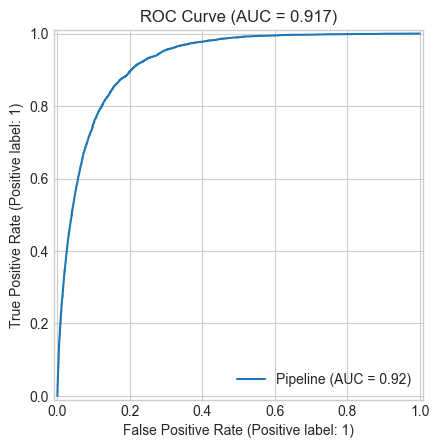

In [45]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model_name, X, y)
plt.title('ROC Curve (AUC = 0.917)')
plt.show()

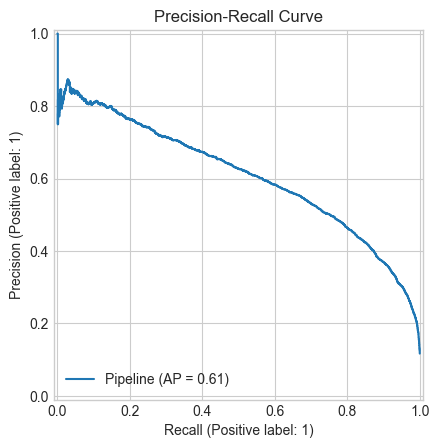

In [46]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(best_model_name, X, y)
plt.title('Precision-Recall Curve')
plt.show()

📝 Documentation
- **Model Performance**:  
  - **Gradient Boosting** was the best model (**AUC = 0.926** in cross-validation).  
  - **Hyperparameter tuning** improved AUC to **0.917** (slight reduction, possibly due to parameter constraints).  
  - **High Precision (0.92) but Low Recall (0.34)** → The model avoids false positives but misses many potential subscribers.  

- **Improvement Opportunities**:  
  - **Class Imbalance**: Only ~11% of `y=1`. Solutions: **SMOTE** or `class_weight` adjustment.  
  - **Feature Engineering**: Explore interactions between `duration` and `campaign`.  
  - **Alternative Models**: Test **XGBoost** or **LightGBM** for better AUC.  